In [564]:
import pandas as pd

# column selection

file_path = 'raw_datasets/main_dataset/forecasts_and_truth.csv'

df_main = pd.read_csv(file_path)

columns_to_keep = [
    'target_end_date', 'forecast_date', 'team_model', 'model_type', 'model_type.general', 'location', 'location_name', 'geo_type',
    'abbreviation', 'population', 'forecast_value',
    'abs_error', 'forecast_week', 'target_week'
]

filtered_df_main = df_main[columns_to_keep]

filtered_df_main.to_csv('processed_data/filtered_main_dataset.csv', index=False)

In [565]:
df_fmain = pd.read_csv('processed_data/filtered_main_dataset.csv')

df_fmain = df_fmain[df_fmain['location_name'] != 'United States']

# Suspecting the truth value from the main dataset is not accurate, may change to a supplementary one to compare.
#grouped_df_fmain = df_fmain.groupby(['target_end_date', 'location_name']).agg({
    #'truth_value': 'first',
    #'abbreviation': 'first'
#}).reset_index()

#grouped_df_fmain.to_csv('processed_data/unique_truth_main_dataset.csv', index=False)

In [566]:
# filtering government response

df_government_response = pd.read_csv('raw_datasets/supplementary_dataset_TS/oxford-government-response.csv')

# Cleaning data in a more effective way by remvoing duplicates 
df_government_response = df_government_response.drop_duplicates()

df_government_response = df_government_response[df_government_response['location_key'].fillna('placeholder').str.startswith('US')]

# Convert data column into datetime format
df_government_response['date'] = pd.to_datetime(df_government_response['date'])

# Feaure engineering
# Calculating the relative stringency index 
relative_stringency_index = df_government_response['stringency_index'] - df_government_response.groupby('location_key')['stringency_index'].transform('mean')

# Adding mean and relative stringency index as colums into government response dataframe
df_government_response['relative_stringency_index'] = relative_stringency_index

display(df_government_response)


,date,location_key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,...,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,relative_stringency_index
245543,2020-01-01,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-55.817378
245544,2020-01-02,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-55.817378
245545,2020-01-03,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-55.817378
245546,2020-01-04,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-55.817378
245547,2020-01-05,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-55.817378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293756,2022-07-15,US_WY,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,...,NaN,2.0,3.0,1.0,NaN,NaN,0.0,5.0,36.11,-9.827712
293757,2022-07-16,US_WY,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,...,NaN,2.0,3.0,1.0,NaN,NaN,0.0,5.0,36.11,-9.827712
293758,2022-07-17,US_WY,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,...,NaN,2.0,3.0,1.0,NaN,NaN,0.0,5.0,36.11,-9.827712
293759,2022-07-18,US_WY,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,...,NaN,2.0,3.0,1.0,NaN,NaN,0.0,5.0,36.11,-9.827712


In [567]:
# filtering mobility

df_mobility = pd.read_csv('raw_datasets/supplementary_dataset_TS/mobility.csv')

df_mobility = df_mobility.drop_duplicates()

df_mobility = df_mobility[df_mobility['location_key'].fillna('placeholder').str.startswith('US')]

# Convert data column into datetime format
df_mobility['date'] = pd.to_datetime(df_mobility['date'])

# Feature engineering
# Calculating the relative mobility for grocery and pharmacy column 
relative_mobility = df_mobility['mobility_grocery_and_pharmacy'] - df_mobility.groupby('location_key')['mobility_grocery_and_pharmacy'].transform('mean')

# Adding resulted mobility data for grocery and pharmacy as a new column
df_mobility['relative_mobility'] = relative_mobility

display(df_mobility)


,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,relative_mobility
3845350,2020-02-15,US,6.0,2.0,15.0,3.0,2.0,-1.0,4.530287
3845351,2020-02-16,US,7.0,1.0,16.0,2.0,0.0,-1.0,3.530287
3845352,2020-02-17,US,6.0,0.0,28.0,-9.0,-24.0,5.0,2.530287
3845353,2020-02-18,US,0.0,-1.0,6.0,1.0,0.0,1.0,1.530287
3845354,2020-02-19,US,2.0,0.0,8.0,1.0,1.0,0.0,2.530287
...,...,...,...,...,...,...,...,...,...
6291290,2022-09-06,US_WY_56045,NaN,NaN,NaN,NaN,-15.0,NaN,NaN
6291291,2022-09-07,US_WY_56045,NaN,NaN,NaN,NaN,-23.0,NaN,NaN
6291292,2022-09-08,US_WY_56045,NaN,NaN,NaN,NaN,-19.0,NaN,NaN
6291293,2022-09-09,US_WY_56045,NaN,NaN,NaN,NaN,-14.0,NaN,NaN


In [568]:
import numpy as np

# filtering vaccination

df_vaccinations = pd.read_csv('raw_datasets/supplementary_dataset_TS/vaccinations.csv')

df_vaccinations = df_vaccinations.drop_duplicates()

df_vaccinations = df_vaccinations[df_vaccinations['location_key'].fillna('placeholder').str.startswith('US')]

columns_to_keep = [
    'date', 'location_key', 'cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated'
]

df_vaccinations = df_vaccinations[columns_to_keep]

# Convert data column into datetime format
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])

# Feature engineering
# Calcualtes the ratio between cumulative persons vaccinated and cumulative persons fully vaccinated
vaccination_ratio = np.where(df_vaccinations['cumulative_persons_vaccinated'] != 0,
                                       df_vaccinations['cumulative_persons_vaccinated'] / df_vaccinations['cumulative_persons_fully_vaccinated'],
                                       np.nan)

# Adding this calculated values as a new column
df_vaccinations['vaccination_ratio'] = vaccination_ratio

In [569]:
# filtering hospitalizations

df_hospitalizations = pd.read_csv('raw_datasets/supplementary_dataset_TS/hospitalizations.csv')

df_mobility = df_mobility.drop_duplicates()
 
df_hospitalizations = df_hospitalizations[df_hospitalizations['location_key'].fillna('placeholder').str.startswith('US')]

columns_to_keep = [
    'date', 'location_key', 'new_hospitalized_patients', 'cumulative_hospitalized_patients'
]

df_hospitalizations = df_hospitalizations[columns_to_keep]


# Convert data column into datetime format
df_hospitalizations['date'] = pd.to_datetime(df_hospitalizations['date'])

# Feature engineering
# Calculating the new hospitalized patients per location
relative_new_hospitalized_patients = df_hospitalizations['new_hospitalized_patients'] - df_hospitalizations.groupby('location_key')['new_hospitalized_patients'].transform('mean')

# Calculates the ratio between new hospitalized patients and cumulative hospitalized patients
hospitalized_patients_ratio = np.where(df_hospitalizations['cumulative_hospitalized_patients'] != 0,
                                       df_hospitalizations['cumulative_hospitalized_patients'] / df_hospitalizations['new_hospitalized_patients'],
                                       np.nan)

# Adds the hospitalized calculated as a new column
df_hospitalizations['hospitalized_patients_ratio'] = hospitalized_patients_ratio

display(df_hospitalizations)


,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,hospitalized_patients_ratio
1710344,2020-01-13,US,0.0,0.0,NaN
1710345,2020-01-14,US,0.0,0.0,NaN
1710346,2020-01-15,US,0.0,0.0,NaN
1710347,2020-01-16,US,0.0,0.0,NaN
1710348,2020-01-17,US,0.0,0.0,NaN
...,...,...,...,...,...
1768480,2022-09-11,US_WY,3.0,10754.0,3584.666667
1768481,2022-09-12,US_WY,4.0,10758.0,2689.500000
1768482,2022-09-13,US_WY,7.0,10765.0,1537.857143
1768483,2022-09-14,US_WY,7.0,10772.0,1538.857143


In [570]:
abbreviations = pd.read_csv('processed_data/unique_truth_main_dataset.csv')['abbreviation'].unique()

abbreviations = ["US_" + abbreviation for abbreviation in abbreviations]

def match_and_replace(location_key):
    if location_key in abbreviations:
        return location_key
    else:
        return None

In [571]:
# key matching government response

df_government_response = df_government_response.groupby(['date', 'location_key']).mean().reset_index()

df_government_response['matched_location_key'] = df_government_response['location_key'].apply(match_and_replace)

df_government_response = df_government_response.dropna(subset=['matched_location_key'])

df_government_response['location_key'] = df_government_response['matched_location_key']

df_government_response = df_government_response.drop(columns=['matched_location_key'])

df_government_response.head()

,date,location_key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,...,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,relative_stringency_index
1,2020-01-01,US_AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-45.591729
2,2020-01-01,US_AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-38.899946
3,2020-01-01,US_AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.238280
4,2020-01-01,US_AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-39.020792
5,2020-01-01,US_CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-49.894973


In [572]:
# key matching mobility

df_mobility = df_mobility.groupby(['date', 'location_key']).mean().reset_index()

df_mobility['matched_location_key'] = df_mobility['location_key'].apply(match_and_replace)

df_mobility = df_mobility.dropna(subset=['matched_location_key'])

df_mobility['location_key'] = df_mobility['matched_location_key']

df_mobility = df_mobility.drop(columns=['matched_location_key'])

df_mobility.head()

,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,relative_mobility
1,2020-02-15,US_AK,5.0,3.0,14.0,2.0,1.0,0.0,-5.184910
7,2020-02-15,US_AL,5.0,2.0,39.0,7.0,2.0,-1.0,-1.445271
74,2020-02-15,US_AR,3.0,2.0,8.0,-3.0,1.0,0.0,-1.531350
139,2020-02-15,US_AZ,3.0,2.0,13.0,3.0,-1.0,0.0,9.409139
155,2020-02-15,US_CA,1.0,1.0,19.0,1.0,-1.0,0.0,9.860786


In [573]:
# key matching vaccinations

df_vaccinations['matched_location_key'] = df_vaccinations['location_key'].apply(match_and_replace)

df_vaccinations = df_vaccinations.dropna(subset=['matched_location_key'])

df_vaccinations['location_key'] = df_vaccinations['matched_location_key']

df_vaccinations = df_vaccinations.drop(columns=['matched_location_key'])

df_vaccinations.head()

,date,location_key,cumulative_persons_vaccinated,cumulative_persons_fully_vaccinated,vaccination_ratio
917598,2021-01-12,US_AK,22486.0,5400.0,4.164074
917599,2021-01-13,US_AK,24541.0,6166.0,3.980052
917600,2021-01-14,US_AK,35508.0,NaN,NaN
917601,2021-01-15,US_AK,39546.0,9406.0,4.204338
917602,2021-01-19,US_AK,55434.0,10802.0,5.131827


In [574]:
# key matching hospitalizations

df_hospitalizations['matched_location_key'] = df_hospitalizations['location_key'].apply(match_and_replace)

df_hospitalizations = df_hospitalizations.dropna(subset=['matched_location_key'])

df_hospitalizations['location_key'] = df_hospitalizations['matched_location_key']

df_hospitalizations = df_hospitalizations.drop(columns=['matched_location_key'])

df_hospitalizations.head()

,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,hospitalized_patients_ratio
1711321,2020-03-06,US_AK,0.0,NaN,NaN
1711322,2020-03-07,US_AK,0.0,NaN,NaN
1711323,2020-03-08,US_AK,0.0,NaN,NaN
1711324,2020-03-09,US_AK,1.0,1.0,1.0
1711325,2020-03-10,US_AK,0.0,1.0,inf


In [575]:
# merging government response, mobility, vaccinations and hospitalizations

merged_df = pd.merge(df_mobility, df_vaccinations, on=['date', 'location_key'], how='outer', suffixes=('_df1', '_df2'))

final_merged_df = pd.merge(merged_df, df_hospitalizations, on=['date', 'location_key'], how='outer', suffixes=('', '_df3'))

final_merged_df = pd.merge(final_merged_df, df_government_response, on=['date', 'location_key'], how='outer', suffixes=('', '_df3'))

final_merged_df.sort_values(by=['date', 'location_key'], inplace=True)

final_merged_df = final_merged_df.dropna()

final_merged_df.to_csv('processed_data/merged_dataset.csv', index=False)

final_merged_df.head()

,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,relative_mobility,cumulative_persons_vaccinated,...,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,relative_stringency_index
16932,2021-01-12,US_AK,-17.0,-11.0,-4.0,-35.0,-24.0,11.0,-19.184910,22486.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,2.0,61.57,15.978271
16933,2021-01-12,US_AL,-15.0,-7.0,-25.0,-15.0,-24.0,9.0,-10.445271,70861.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,2.0,43.52,4.620054
16935,2021-01-12,US_AZ,-21.0,-11.0,-26.0,-30.0,-37.0,13.0,-3.590861,95141.0,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,2.0,61.11,22.089208
16940,2021-01-12,US_FL,-21.0,-10.0,-37.0,-38.0,-29.0,10.0,-3.299681,586741.0,...,0.0,2.0,2.0,1.0,0.0,0.0,3.0,2.0,47.69,8.056254
16948,2021-01-12,US_KY,-17.0,-3.0,-8.0,-13.0,-28.0,9.0,-6.233794,102517.0,...,0.0,2.0,3.0,2.0,0.0,0.0,3.0,2.0,60.19,14.512385


In [576]:
# merge with main dataset

merged_df = pd.merge(df_mobility, df_vaccinations, on=['date', 'location_key'], how='outer', suffixes=('_mobility', '_vaccinations'))

merged_df = pd.merge(merged_df, df_hospitalizations, on=['date', 'location_key'], how='outer')

merged_df = pd.merge(merged_df, df_government_response, on=['date', 'location_key'], how='outer')

display(merged_df.head())


,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,relative_mobility,cumulative_persons_vaccinated,...,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index,relative_stringency_index
0,2020-02-15,US_AK,5.0,3.0,14.0,2.0,1.0,0.0,-5.184910,NaN,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,11.11,-34.481729
1,2020-02-15,US_AL,5.0,2.0,39.0,7.0,2.0,-1.0,-1.445271,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00,-38.899946
2,2020-02-15,US_AR,3.0,2.0,8.0,-3.0,1.0,0.0,-1.531350,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00,-40.238280
3,2020-02-15,US_AZ,3.0,2.0,13.0,3.0,-1.0,0.0,9.409139,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.56,-33.460792
4,2020-02-15,US_CA,1.0,1.0,19.0,1.0,-1.0,0.0,9.860786,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,8.33,-41.564973


In [577]:
# air quality data

df_air_AL_2021 = pd.read_csv('raw_datasets/air_quanlity/AL2021.csv')

df_air_AL_2021 = df_air_AL_2021[['Date', 'DAILY_AQI_VALUE']]

df_air_AL_2021 = df_air_AL_2021.groupby('Date').mean().reset_index()

df_air_AL_2022 = pd.read_csv('raw_datasets/air_quanlity/AL2022.csv')

df_air_AL_2022 = df_air_AL_2022[['Date', 'DAILY_AQI_VALUE']]

df_air_AL_2022 = df_air_AL_2022.groupby('Date').mean().reset_index()

df_air_AL = pd.concat([df_air_AL_2021, df_air_AL_2022], ignore_index=True)

df_air_AL['Date'] = pd.to_datetime(df_air_AL['Date'])

df_air_AL['Date'] = df_air_AL['Date'].dt.strftime('%Y-%m-%d')

df_air_AL.rename(columns={'Date': 'date', 'DAILY_AQI_VALUE': 'daily_aqi_value'}, inplace=True)

df_air_AL['date'] = pd.to_datetime(df_air_AL['date'])

df_air_AL.head()


,date,daily_aqi_value
0,2021-01-01,112.875
1,2021-01-02,72.250
2,2021-01-03,26.875
3,2021-01-04,36.000
4,2021-01-05,72.625


In [578]:
# merging final dataframe
final_merged_df = pd.merge(final_merged_df, df_air_AL, on='date', how='outer', suffixes=('_left', '_right'))

final_merged_df = final_merged_df.dropna()

final_merged_df.to_csv('processed_data/final_merged_dataset.csv', index=False)

In [579]:
# MLR regression with OneHotEncoding

import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('processed_data/final_merged_dataset.csv')

df = pd.get_dummies(df, columns=['location_key'], dtype=int)

# convert 'date' from string to datetime, then to ordinal to use as a numerical variable
df['date'] = pd.to_datetime(df['date'])
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

# independent variables
X = df[['mobility_workplaces', 'mobility_residential', 'cumulative_persons_vaccinated', 'new_hospitalized_patients', 'daily_aqi_value', 
        'location_key_US_AK', 'location_key_US_AL', 'location_key_US_AR', 'location_key_US_AZ', 'location_key_US_CA', 'location_key_US_DE', 'location_key_US_FL', 'location_key_US_GA', 'location_key_US_HI', 'location_key_US_IL', 'location_key_US_IN', 'location_key_US_KY', 'location_key_US_MA', 'location_key_US_ME', 'location_key_US_MI', 'location_key_US_MT', 'location_key_US_NM', 'location_key_US_NV', 'location_key_US_OK', 'location_key_US_OR', 'location_key_US_PA', 'location_key_US_SC', 'location_key_US_TN', 'location_key_US_TX', 'location_key_US_UT', 'location_key_US_VA', 'location_key_US_WA', 'location_key_US_WI', 'location_key_US_WV']]
# constant
X = sm.add_constant(X)

# dependent variable
y = df['relative_stringency_index']

# fit the model
main_model = sm.OLS(y, X).fit()

# summary
print(main_model.summary())

                                OLS Regression Results                               
Dep. Variable:     relative_stringency_index   R-squared:                       0.667
Model:                                   OLS   Adj. R-squared:                  0.664
Method:                        Least Squares   F-statistic:                     208.0
Date:                       Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                               11:07:07   Log-Likelihood:                -10790.
No. Observations:                       3460   AIC:                         2.165e+04
Df Residuals:                           3426   BIC:                         2.186e+04
Df Model:                                 33                                         
Covariance Type:                   nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [592]:
# MLR regression on US_CA (most positive coefficient)

import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime

df = pd.read_csv('processed_data/final_merged_dataset.csv')

df_ca = df[df['location_key'] == 'US_CA'].copy()

# convert 'date' from string to datetime, then to ordinal to use as a numerical variable
df_ca['date'] = pd.to_datetime(df_ca['date'])
df_ca['date_ordinal'] = df_ca['date'].apply(lambda x: x.toordinal())

# independent variables
X = df_ca[['date_ordinal', 'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
           'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces',
           'mobility_residential', 'cumulative_persons_vaccinated', 'new_hospitalized_patients', 'daily_aqi_value']]
# constant
X = sm.add_constant(X)

# dependent variable
y = df_ca['relative_mobility']

# fit the model
CA_model = sm.OLS(y, X).fit()

# summary
print(CA_model.summary())

                            OLS Regression Results                            
Dep. Variable:      relative_mobility   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.120e+23
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:09:41   Log-Likelihood:                 4413.6
No. Observations:                 194   AIC:                            -8805.
Df Residuals:                     183   BIC:                            -8769.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

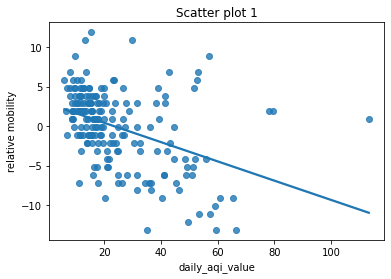

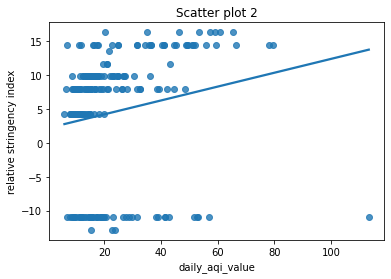

In [593]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='daily_aqi_value', y='relative_mobility', data=df_ca, ci=None)
plt.title('Scatter plot 1')
plt.xlabel('daily_aqi_value')
plt.ylabel('relative mobility')
plt.show()

sns.regplot(x='daily_aqi_value', y='relative_stringency_index', data=df_ca, ci=None)
plt.title('Scatter plot 2')
plt.xlabel('daily_aqi_value')
plt.ylabel('relative stringency index')
plt.show()

In [594]:
# MLR regression on US_IN (most negative coefficient)

import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime

df = pd.read_csv('processed_data/final_merged_dataset.csv')

df_in = df[df['location_key'] == 'US_IN'].copy()

# convert 'date' from string to datetime, then to ordinal to use as a numerical variable
df_in['date'] = pd.to_datetime(df_in['date'])
df_in['date_ordinal'] = df_in['date'].apply(lambda x: x.toordinal())

# independent variables
X = df_in[['date_ordinal', 'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
           'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces',
           'mobility_residential', 'cumulative_persons_vaccinated', 'new_hospitalized_patients', 'daily_aqi_value']]
# constant
X = sm.add_constant(X)

# dependent variable
y = df_in['relative_stringency_index']

# fit the model
IN_model = sm.OLS(y, X).fit()

# summary
print(IN_model.summary())

                                OLS Regression Results                               
Dep. Variable:     relative_stringency_index   R-squared:                       0.976
Model:                                   OLS   Adj. R-squared:                  0.975
Method:                        Least Squares   F-statistic:                     663.6
Date:                       Mon, 04 Mar 2024   Prob (F-statistic):          1.68e-126
Time:                               11:09:49   Log-Likelihood:                -267.32
No. Observations:                        174   AIC:                             556.6
Df Residuals:                            163   BIC:                             591.4
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

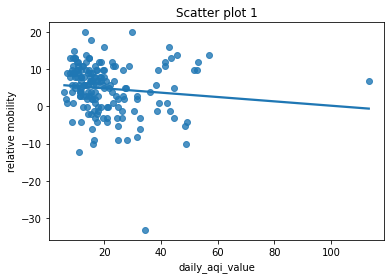

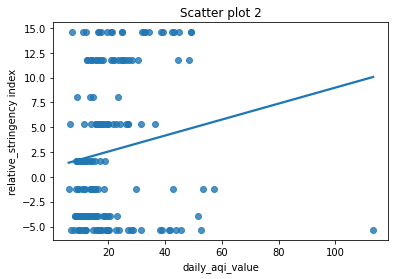

In [595]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='daily_aqi_value', y='relative_mobility', data=df_in, ci=None)
plt.title('Scatter plot 1')
plt.xlabel('daily_aqi_value')
plt.ylabel('relative mobility')
plt.show()

sns.regplot(x='daily_aqi_value', y='relative_stringency_index', data=df_in, ci=None)
plt.title('Scatter plot 2')
plt.xlabel('daily_aqi_value')
plt.ylabel('relative_stringency index')
plt.show()

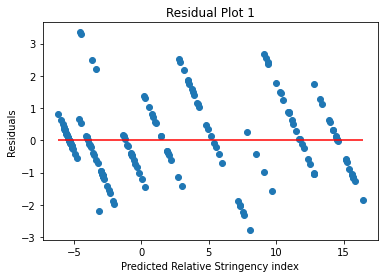

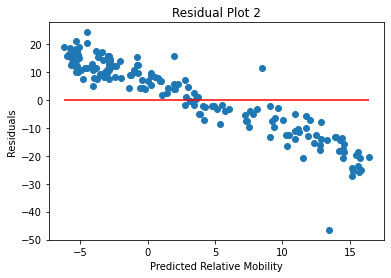

In [598]:
# Fit the model and predict 'relative_strengency_index' for IN cause for some reason CA plotted blank graphs**
model = sm.OLS(y, X).fit()
df_in['relative_stringency_index_predicted'] = model.predict(X)

df_in['residuals'] = df_in['relative_stringency_index'] - df_in['relative_stringency_index_predicted']

plt.scatter(df_in['relative_stringency_index_predicted'], df_in['residuals'])
plt.hlines(y=0, xmin=df_in['relative_stringency_index_predicted'].min(), xmax=df_in['relative_stringency_index_predicted'].max(), colors='red')
plt.title('Residual Plot 1')
plt.xlabel('Predicted Relative Stringency index')
plt.ylabel('Residuals')
plt.show()

# Fit the model and predict 'relative_mobility'
model = sm.OLS(y, X).fit()
df_in['relative_mobility_predicted'] = model.predict(X)

df_in['residuals'] = df_in['relative_mobility'] - df_in['relative_mobility_predicted']

plt.scatter(df_in['relative_mobility_predicted'], df_in['residuals'])
plt.hlines(y=0, xmin=df_in['relative_mobility_predicted'].min(), xmax=df_in['relative_mobility_predicted'].max(), colors='red')
plt.title('Residual Plot 2')
plt.xlabel('Predicted Relative Mobility')
plt.ylabel('Residuals')
plt.show()


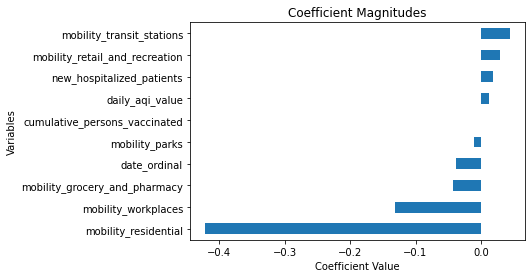

In [599]:
coef_df = pd.DataFrame(model.params)
coef_df.columns = ['Coefficient']
coef_df.drop('const', inplace=True)

# Plotting coefficients
coef_df.sort_values(by='Coefficient', ascending=True).plot(kind='barh', legend=False)
plt.title('Coefficient Magnitudes')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.show()

In [600]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

df_US = pd.read_csv('processed_data/final_merged_dataset.csv')
df = df_US[df_US['location_key'] == 'US_CA'].copy()

df['date'] = pd.to_datetime(df['date'])
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

# independent and dependent variables
X = df[['date_ordinal', 'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy', 'mobility_workplaces', 'mobility_residential', 'new_hospitalized_patients', 'daily_aqi_value']]
y = df['relative_stringency_index']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# initialize
rf_model = RandomForestRegressor(n_estimators=300, random_state=50)

# k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -cv_scores  # convert scores to positive MSE values
rmse_scores = np.sqrt(mse_scores)
print("Average RMSE across 5 folds:", np.mean(rmse_scores))

# train
rf_model.fit(X_train, y_train)

# predictions on the test set
predictions = rf_model.predict(X_test)

# evaluation
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"R^2: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

importances = rf_model.feature_importances_

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)


Average RMSE across 5 folds: 0.9705192610004139
R^2: 0.9970213142981056
MAE: 0.23500598290599564
RMSE: 0.5530221076914043
                          feature  importance
0                    date_ordinal    0.990466
5       new_hospitalized_patients    0.007323
1  mobility_retail_and_recreation    0.000910
2   mobility_grocery_and_pharmacy    0.000902
6                 daily_aqi_value    0.000203
3             mobility_workplaces    0.000178
4            mobility_residential    0.000018


In [601]:
import pandas as pd

df = pd.read_csv('raw_datasets/main_dataset/forecasts_and_truth.csv')

df = df[df['team_model'] == 'COVIDhub-baseline'].copy()

avg_error = df['abs_error'].mean()

print(avg_error)

4928.406385559237


In [588]:
# future improvements for lineal regression and random forest dataset: 
# for linreal regression, use OneHotEncoder to encode the location_key and use it as a variable
# for random forest, use LabelEncoder to encode the location_key and use it as a variable